In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
print(train.info())
print("="*5)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
=====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non

In [6]:
pd.crosstab(train.Pclass,train.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [7]:
pd.crosstab (train.Embarked,train.Survived,margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


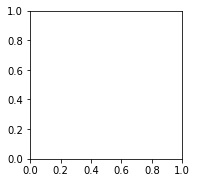

In [8]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)


In [9]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
train = train.replace(['male','female'],[1,0])
test = test.replace(["male","female"],[1,0])

In [11]:
train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [12]:
train =pd.concat((train,pd.get_dummies(train.Embarked,drop_first=True),),axis=1)
test = pd.concat((train,pd.get_dummies(train.Embarked,drop_first=True),),axis=1)

In [13]:
train = pd.concat((train,pd.get_dummies(train.Pclass,drop_first=True),),axis=1)

In [14]:
test = pd.concat((test,pd.get_dummies(test.Pclass,drop_first=True),),axis=1)

In [15]:
train.pivot_table(values="SibSp",index="Survived",columns="Pclass",aggfunc=np.mean)

Pclass,1,2,3
Survived,,,
0,0.287500,0.319588,0.672043
1,0.492647,0.494253,0.436975


In [16]:
train.pivot_table(values="Fare",index="Survived",columns="Pclass",aggfunc=np.mean)

Pclass,1,2,3
Survived,,,
0,64.684008,19.412328,13.669364
1,95.608029,22.055700,13.694887


In [17]:
train.Fare.isnull().sum()

0

In [18]:
test.Fare.isnull().sum()

0

In [19]:
test["Fare"].fillna(test["Fare"].mean(),inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [20]:
'''from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy = "mean",axis=1)
train["Age"] = imputer.fit(train['Age'])'''

'from sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values=\'NaN\',strategy = "mean",axis=1)\ntrain["Age"] = imputer.fit(train[\'Age\'])'

In [21]:
train.Age.isnull().sum()

177

In [23]:
train.Cabin.isnull().sum()

687

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Q              891 non-null uint8
S              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
dtypes: float64(2), int64(6), object(4), uint8(4)
memory usage: 87.1+ KB


In [25]:
train.Age.mean()


29.69911764705882

In [28]:
train.Age.fillna(train.Age.mean)

0                                                     22
1                                                     38
2                                                     26
3                                                     35
4                                                     35
                             ...                        
886                                                   27
887                                                   19
888    <bound method Series.mean of 0      22.0\n1   ...
889                                                   26
890                                                   32
Name: Age, Length: 891, dtype: object

In [30]:
train.Age[train.Age.isnull()] = train.Age.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
list = ['Name','Ticket','Survived','Embarked',"Cabin"]
X = train.drop(list,axis=1).values
Y = train["Survived"].values

In [56]:
from sklearn .preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
Y_pred = lr.predict(X)

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,Y_pred)
cm

array([[476,  73],
       [102, 240]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score,classification_report
ac= accuracy_score(Y,Y_pred)
cr = classification_report(Y,Y_pred)
print(ac)
print(cr)

0.8035914702581369
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

